**Background for the project**

The problem of brain - mri is a well understood problem with plenty of quality data around the web. In our case we picked a small data-card, but with good labling.

Additonaly, although with strong computational power modern models can predict image to image classification, showing exaclty which part they think is cancerous. This is very costly, and wasn't available for us.

In this project we use a diffrent method called **"GradCAM"** to visualize which part of the image was the most important for the prediction, showing what areas are cancerous with very little cost, and not influancing the training and cost of the base model.

In [35]:
# for readability some functions and definitions are written
# in a file called res_define, if you are interested on the code you can allways check it out

import res_define
import res_define
import importlib

importlib.reload(res_define)
#this is if we changes stuff in the res_define, and we want to update it without restarting the py kernal

<module 'res_define' from '/home/sagie/Documents/BIU/יישומי סטטיסטיקה/Brain-MRI/res_define.py'>

**Data Exploritory**

In [7]:
train_df,test_df,val_df,train_ds,test_ds,val_ds,train_dl,test_dl,val_dl = res_define.create_data()

**CNN**

In [5]:
import torch
from torch import nn
import torch.nn.functional as F

device = res_define.device #this makes sure we have one coherent device along the notebooks

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 61 * 61, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)

    def forward(self, x):
        '''
        starts at torch.Size([4, 3, 256, 256])
        torch.Size([4, 6, 252, 252])
        torch.Size([4, 6, 126, 126])
        torch.Size([4, 16, 122, 122])
        torch.Size([4, 16, 61, 61])`
        then flattens to NN
        '''
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = x.reshape(-1, 16 * 61 * 61)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

cnn = CNN().to(device)

In [11]:
res_define.train_model(cnn,train_dl,val_dl)
cnn.eval()

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

Epoch 1/8, Step 0/89, Current accuracy: 75.00%, Running loss: 0.5202
Epoch 1/8, Step 40/89, Current accuracy: 81.80%, Running loss: 0.5270
Epoch 1/8, Step 80/89, Current accuracy: 81.72%, Running loss: 0.5274
Epoch [1/8], Loss: 0.5281


  0%|          | 0/23 [00:00<?, ?it/s]

Validation Loss: 0.5276, Validation Accuracy: 78.39%


  0%|          | 0/89 [00:00<?, ?it/s]

Epoch 2/8, Step 0/89, Current accuracy: 75.00%, Running loss: 0.5229
Epoch 2/8, Step 40/89, Current accuracy: 80.86%, Running loss: 0.5304
Epoch 2/8, Step 80/89, Current accuracy: 79.53%, Running loss: 0.5369
Epoch [2/8], Loss: 0.5372


  0%|          | 0/23 [00:00<?, ?it/s]

Validation Loss: 0.5328, Validation Accuracy: 77.40%


  0%|          | 0/89 [00:00<?, ?it/s]

Epoch 3/8, Step 0/89, Current accuracy: 78.12%, Running loss: 0.5290
Epoch 3/8, Step 40/89, Current accuracy: 81.88%, Running loss: 0.5266
Epoch 3/8, Step 80/89, Current accuracy: 82.34%, Running loss: 0.5264
Epoch [3/8], Loss: 0.5248


  0%|          | 0/23 [00:00<?, ?it/s]

Validation Loss: 0.5202, Validation Accuracy: 81.36%


  0%|          | 0/89 [00:00<?, ?it/s]

Epoch 4/8, Step 0/89, Current accuracy: 78.12%, Running loss: 0.5133
Epoch 4/8, Step 40/89, Current accuracy: 83.44%, Running loss: 0.5184
Epoch 4/8, Step 80/89, Current accuracy: 82.34%, Running loss: 0.5213
Epoch [4/8], Loss: 0.5202


  0%|          | 0/23 [00:00<?, ?it/s]

Validation Loss: 0.5202, Validation Accuracy: 80.65%


  0%|          | 0/89 [00:00<?, ?it/s]

Epoch 5/8, Step 0/89, Current accuracy: 81.25%, Running loss: 0.5070
Epoch 5/8, Step 40/89, Current accuracy: 85.39%, Running loss: 0.5124
Epoch 5/8, Step 80/89, Current accuracy: 83.91%, Running loss: 0.5150
Epoch [5/8], Loss: 0.5142


  0%|          | 0/23 [00:00<?, ?it/s]

Validation Loss: 0.5180, Validation Accuracy: 81.78%


  0%|          | 0/89 [00:00<?, ?it/s]

Epoch 6/8, Step 0/89, Current accuracy: 81.25%, Running loss: 0.5025
Epoch 6/8, Step 40/89, Current accuracy: 86.88%, Running loss: 0.5058
Epoch 6/8, Step 80/89, Current accuracy: 86.02%, Running loss: 0.5080
Epoch [6/8], Loss: 0.5067


  0%|          | 0/23 [00:00<?, ?it/s]

Validation Loss: 0.5142, Validation Accuracy: 83.33%


  0%|          | 0/89 [00:00<?, ?it/s]

Epoch 7/8, Step 0/89, Current accuracy: 84.38%, Running loss: 0.4959
Epoch 7/8, Step 40/89, Current accuracy: 87.11%, Running loss: 0.5058
Epoch 7/8, Step 80/89, Current accuracy: 85.94%, Running loss: 0.5066
Epoch [7/8], Loss: 0.5060


  0%|          | 0/23 [00:00<?, ?it/s]

Validation Loss: 0.5185, Validation Accuracy: 82.20%


  0%|          | 0/89 [00:00<?, ?it/s]

Epoch 8/8, Step 0/89, Current accuracy: 78.12%, Running loss: 0.5039
Epoch 8/8, Step 40/89, Current accuracy: 85.31%, Running loss: 0.5100
Epoch 8/8, Step 80/89, Current accuracy: 85.00%, Running loss: 0.5123
Epoch [8/8], Loss: 0.5119


  0%|          | 0/23 [00:00<?, ?it/s]

Validation Loss: 0.5471, Validation Accuracy: 79.24%
Training completed!


CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=59536, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
)

although this is not an impressive result, we use the cnn example to showcase the grad-cam. as we will see later, because cnn has more FC-layers it results in a nicer heatmap, unlike the even more convolution based models that result in only a circular bump.

**CNN GRAD**

We visualize what are the activations on the last layer of the model,taking the derivitive in respect to the classification. This is the main idea of GRAD-CAM.

In practice we use more advanced methods, such as Eigen (simillar but uses eigen values to determine the importance) and XGrad.

In [2]:
from pytorch_grad_cam import EigenCAM,AblationCAM,XGradCAM

cnn_visualize_prediction = lambda x : res_define.visualize_prediction(cnn,[cnn.conv2],x,[EigenCAM,AblationCAM])
cnn_visualize_cheap = lambda x : res_define.visualize_prediction(cnn,[cnn.conv2],x,[XGradCAM,AblationCAM])

100%|██████████| 1/1 [00:00<00:00, 40.69it/s]


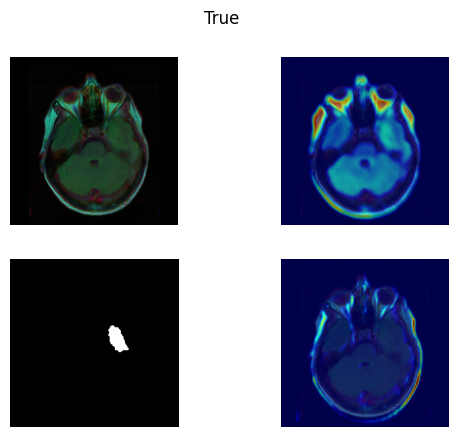

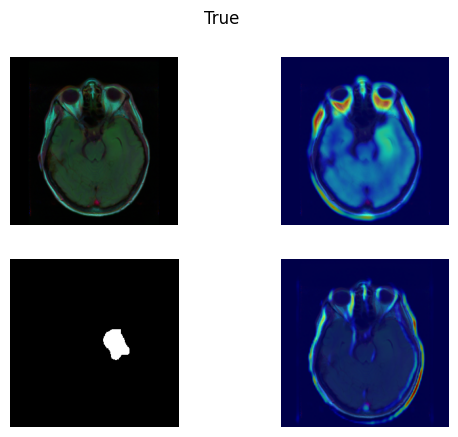

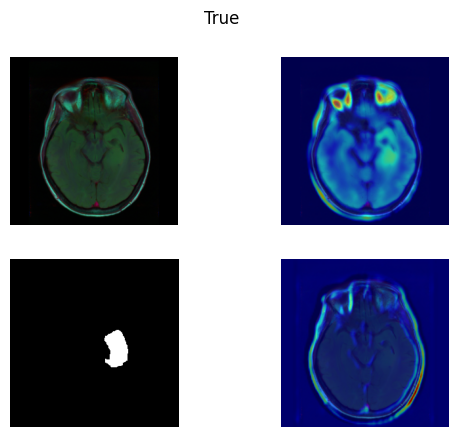

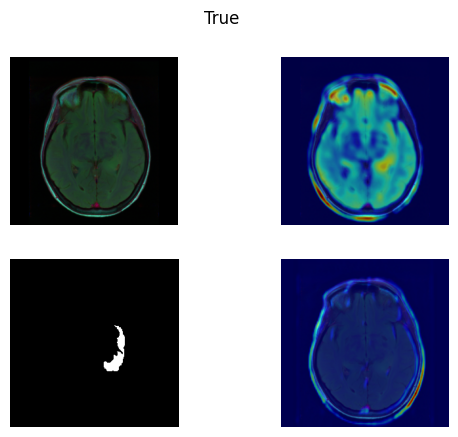

In [37]:
# We advice to skip calling all 4 if you dont want to wait, this is very memory and cpu heavy

cnn_visualize_prediction('kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_8.tif')
cnn_visualize_prediction('kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_9.tif')
cnn_visualize_prediction('kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_10.tif')
cnn_visualize_prediction('kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_11.tif')

In [4]:
cnn_visualize_prediction('kaggle_3m/TCGA_FG_7643_20021104/TCGA_FG_7643_20021104_27.tif')

NameError: name 'res_define' is not defined

You can see some intresting things
- It looks like the cnn learns the edge of the brain too. We can see the activation on the edge between the brain and the background
- Even when the classification is wrong, we can see the cancer in the heatmap. this means even if the network was wrong, it did determine correctly it is an anomaly

Note that we used EigenCam which is very cosly, this was the only method to give good results (prob because the complex FC layers needed more complex model to explain). this is why we move to even more conv baed models in the next section

**RES + ENSAMBLE GRAD**

**DEATH PREDICTION**